**Abhishek Soni**

---


**Contact**: abhishekajt@gmail.com, abhisheksoni.iitb@gmail.com

Some insight on the Dataset

This dataset is basically about how many customers left or remained in a business as function of differecnt parameters

# **Contents**


1.   EDA
2.   Data Preprocessing
3.   Models

> XGBoost


*   Data Preprocessing
*   Upsampling the Dataset
*   Model Training
*   Feature Analysis

> Deep Learning Model (Trained on GPU using PyTorch as backend)

*   Data preprocessing
*   Dataset Generation
*   Network Architecture
*   Training Model
*   Testing the Model
*   Analysing the Results

4.   Concluding remarks on Comparing the XGBoost and Deep Learning Model












# EDA

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('taskdata.csv')
df.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [5]:
def details(df):
  print("Description of training set")
  print("Shape: \t\t\t", df.shape)
  print("#NaNs: \t\t\t", df.isna().sum().sum()) 
  
details(df)

Description of training set
Shape: 			 (4407, 17)
#NaNs: 			 7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [7]:
# Columns containing NAN
def ctd(df):
  columns = df.columns[df.isna().any()].tolist()
  return columns
ctd(df)

['account_id']

In [8]:
# Location of the NAN
print(df.loc[pd.isna(df[df.columns[1]]), :].index)

Int64Index([764, 1002, 2276, 3792, 3967, 4148, 4259], dtype='int64')


There are 7 Missing Values in the 'account_id' columns.
WE can remove them easily

In [9]:
df.dropna(inplace=True)
details(df)

Description of training set
Shape: 			 (4400, 17)
#NaNs: 			 0


In [10]:
def description(df):
  print("#Number of Unique Accounts: \t\t", df.account_id.nunique())
  print("Revenue range from: \t", df.total_revenue.min(), " to ", df.total_revenue.max())
  print("Maximum return day: \t", df.max_return_days.max())

description(df)

#Number of Unique Accounts: 		 15
Revenue range from: 	 0.0  to  43957.1727
Maximum return day: 	 354


Unique Values in the Dataset

In [11]:
def description(df):
  for cols in df.columns:
    print('Unique values for ',cols,' : ',len(df[cols].unique()))
description(df)

Unique values for  user_id  :  4400
Unique values for  account_id  :  15
Unique values for  max_return_days  :  229
Unique values for  average_return_days  :  917
Unique values for  customer_since_months  :  23
Unique values for  total_revenue  :  434
Unique values for  average_revenue  :  510
Unique values for  avg_vas_count  :  677
Unique values for  avg_used_vas_value  :  1027
Unique values for  business_type  :  6
Unique values for  avg_wallet_bonus  :  989
Unique values for  avg_active_ads  :  2755
Unique values for  avg_new_ads  :  1421
Unique values for  avg_email_replies  :  1900
Unique values for  avg_call_replies  :  1932
Unique values for  avg_sms_replies  :  140
Unique values for  target  :  2


This gives us the idea of Unique values, 

User-id -- All entries are unique 

Since the business type is Categorical Type

Target value data analysis

In [12]:
df.target.value_counts()

0    3946
1     454
Name: target, dtype: int64

This gives us the idea of how many users left

## Heat Map for DATA correlation

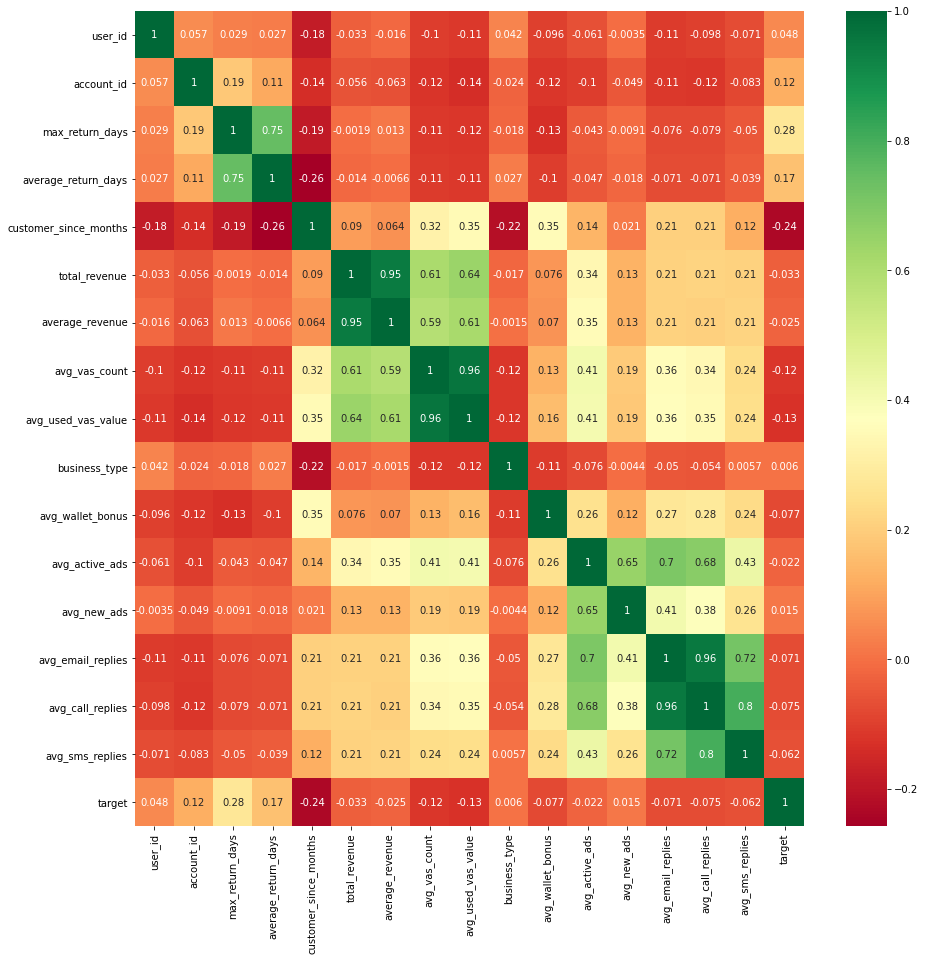

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The above heatmap gives an idea which features to choose.


In [14]:
features = [ 'average_return_days',
       'customer_since_months', 'average_revenue',
        'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies']
len(features)

11

## Anomaly Detections

In [15]:
def anomaly(df,features):
  anaomaly_cols = []
  print('Anomalies in the Dataset :')
  for column in features:
      IQR = df[column].quantile(0.75) - df[column].quantile(0.25) 
      limit_upper = df[column].quantile(0.75) + IQR*1.5
      print(column,' : ',len(df[df[column] > limit_upper]))

      if len(df[df[column] > limit_upper]):
        anaomaly_cols.append(column)
  return anaomaly_cols
  
anaomaly_cols =anomaly(df,features)

Anomalies in the Dataset :
average_return_days  :  595
customer_since_months  :  0
average_revenue  :  572
avg_used_vas_value  :  196
business_type  :  922
avg_wallet_bonus  :  482
avg_active_ads  :  345
avg_new_ads  :  396
avg_email_replies  :  358
avg_call_replies  :  351
avg_sms_replies  :  449


In [16]:
anaomaly_cols

['average_return_days',
 'average_revenue',
 'avg_used_vas_value',
 'business_type',
 'avg_wallet_bonus',
 'avg_active_ads',
 'avg_new_ads',
 'avg_email_replies',
 'avg_call_replies',
 'avg_sms_replies']

The above analysis gives us that this dataset contains many anomalies, we cannot directly reject them, but to decide which one to remove and which one to retain

### Anomaly Columns Analysis 

In [17]:
def anomaly_plot(df,anaomaly_cols):
  for cols in anaomaly_cols:
    plt.figure(figsize=(8, 8))
    sns.distplot(df[cols])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

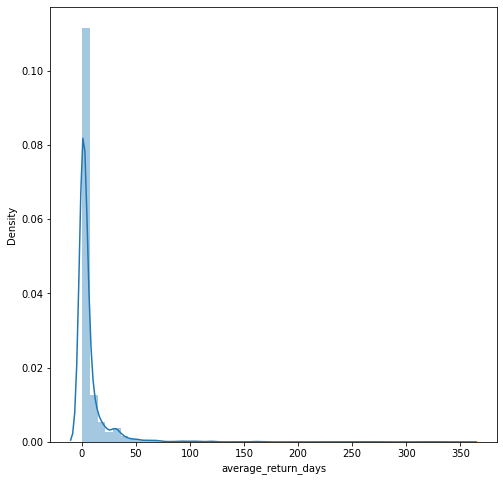

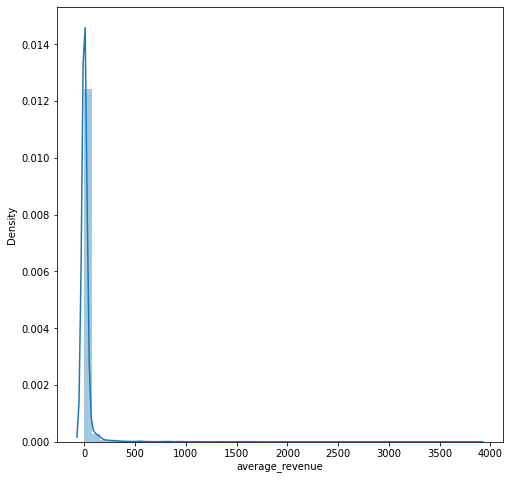

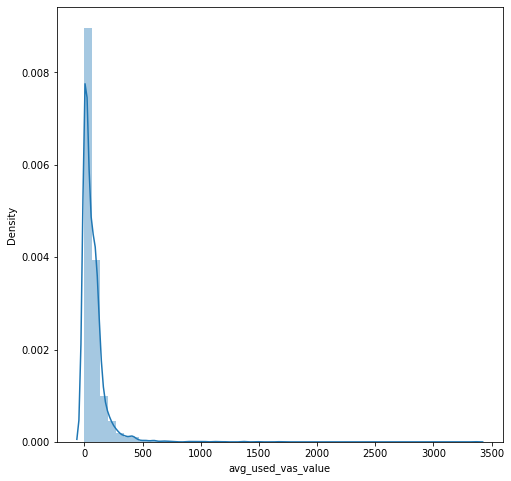

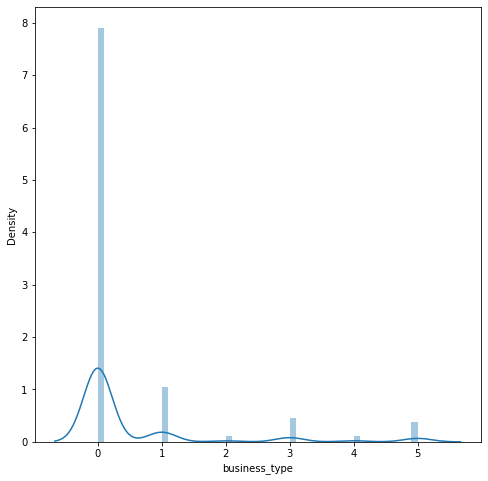

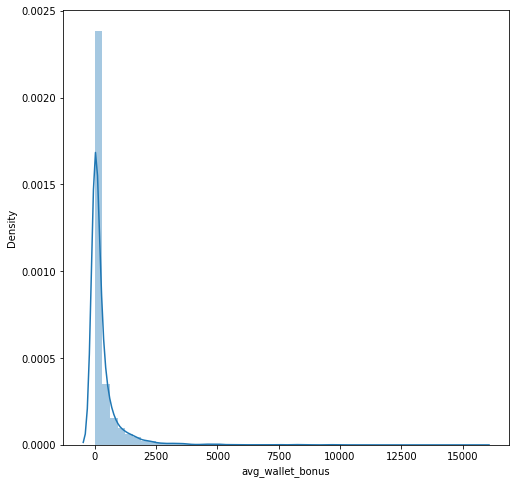

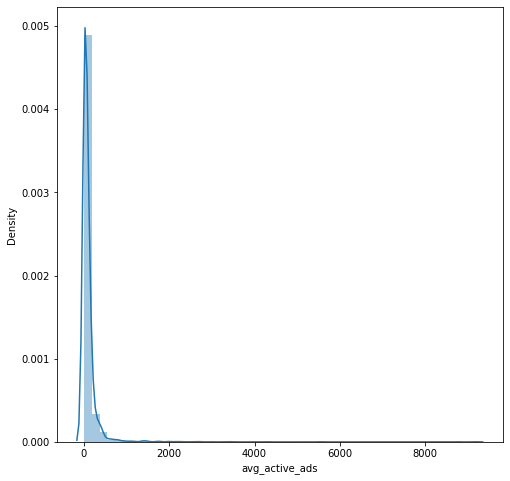

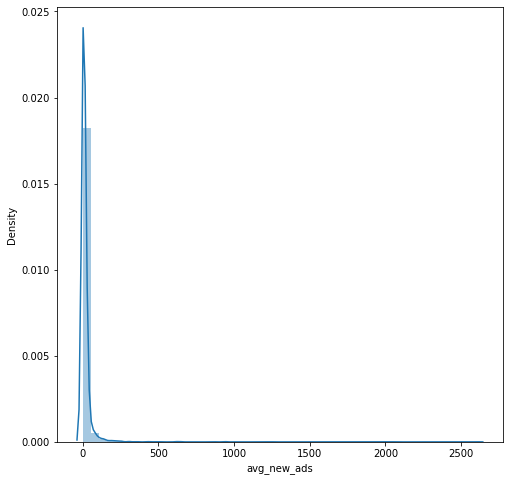

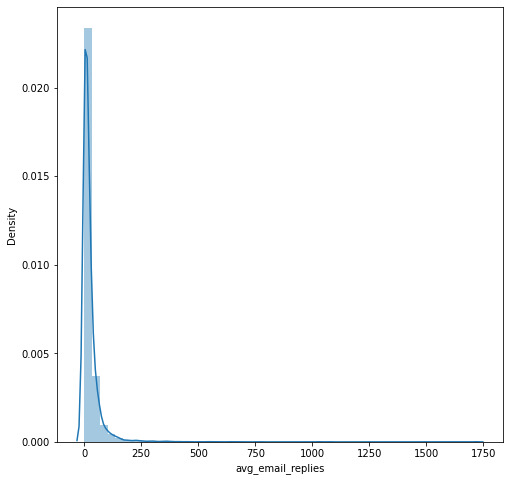

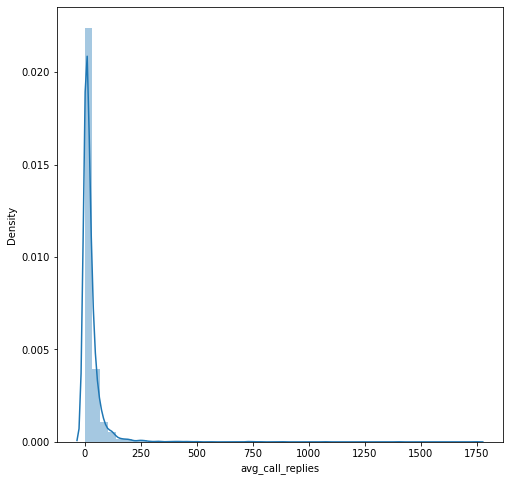

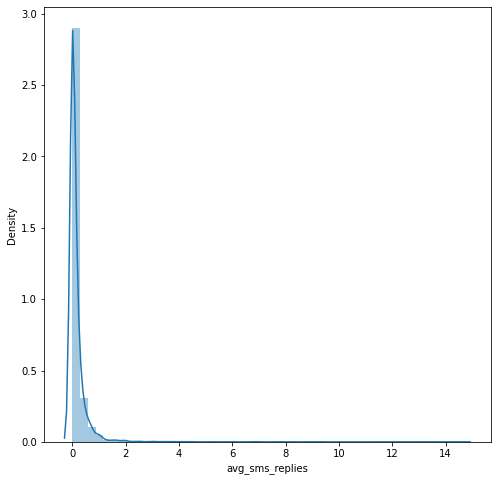

In [18]:
anomaly_plot(df,anaomaly_cols)
#scroll for graphs

From above we esimate the approximate values for anomaly as in the below dictonary 

In [19]:
anomaly_dict = {
    'average_return_days': 35,
    'average_revenue': 220,
    'avg_vas_count': 30,
    'avg_wallet_bonus': 1900,
    'avg_new_ads': 160,
    'avg_email_replies': 150,
    'avg_call_replies': 210
}


Now we'll see how the estimate anomaly values affect the the target values, 
Since the **target = 1** is less, we'll particularly look how many outliers affect those.

In [20]:
def anomaly_efffect(df, dict):
  for key, value in dict.items():
    print(key)
    anomaly = df[df[key] > value] 
    print('No of anomalies above ',value, 'are' ,len(anomaly))
    print('And anomalies with targets as 1 are',len(anomaly[anomaly['target']==1]))
    print(' ')
anomaly_efffect(df, anomaly_dict)

average_return_days
No of anomalies above  35 are 169
And anomalies with targets as 1 are 70
 
average_revenue
No of anomalies above  220 are 67
And anomalies with targets as 1 are 10
 
avg_vas_count
No of anomalies above  30 are 19
And anomalies with targets as 1 are 0
 
avg_wallet_bonus
No of anomalies above  1900 are 148
And anomalies with targets as 1 are 5
 
avg_new_ads
No of anomalies above  160 are 47
And anomalies with targets as 1 are 8
 
avg_email_replies
No of anomalies above  150 are 81
And anomalies with targets as 1 are 3
 
avg_call_replies
No of anomalies above  210 are 50
And anomalies with targets as 1 are 2
 


So we'll reject the anomalies from the columns:


1.   average_return_days
2.   avg_vas_count
3.   avg_new_ads
4.   avg_email_replies
5.   avg_call_replies
6.   average_revenue
7.   avg_wallet_bonus






# Data Preprocessing

In [21]:
anomaly_dict

{'average_return_days': 35,
 'average_revenue': 220,
 'avg_call_replies': 210,
 'avg_email_replies': 150,
 'avg_new_ads': 160,
 'avg_vas_count': 30,
 'avg_wallet_bonus': 1900}

In [22]:
df2 = df

In [23]:
def outlier_removal(df,dict):
  for key, value in dict.items():
    df = df[df[key] < value]
  return df

In [24]:
df = outlier_removal(df,anomaly_dict)
df.dropna(inplace=True)
details(df)
df.info()

Description of training set
Shape: 			 (3943, 17)
#NaNs: 			 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3943 non-null   int64  
 1   account_id             3943 non-null   float64
 2   max_return_days        3943 non-null   int64  
 3   average_return_days    3943 non-null   float64
 4   customer_since_months  3943 non-null   int64  
 5   total_revenue          3943 non-null   float64
 6   average_revenue        3943 non-null   float64
 7   avg_vas_count          3943 non-null   float64
 8   avg_used_vas_value     3943 non-null   float64
 9   business_type          3943 non-null   int64  
 10  avg_wallet_bonus       3943 non-null   float64
 11  avg_active_ads         3943 non-null   float64
 12  avg_new_ads            3943 non-null   float64
 13  avg_email_replies      3943 non-null   float6

In [25]:
len(df)

3943

Remaining are the 3943 columns which we'll process further

**Now I have Used 2 models for predictions**


1.   **Using XGBoost boosting for predictions**

2.   **Using Deep neural network using PyTorch as backend** 



# 1. XGBoost

## Spliting the Data

In [322]:
from sklearn.model_selection import train_test_split

In [324]:
dataset = df[features]
dataset['target'] = df['target']
dataset


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,1.500000,14,0.0,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,8.200000,10,0.0,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,1.533333,15,0.0,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1.000000,14,0.0,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1.000000,18,0.0,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4401,1.000000,1,0.0,0.000000,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
4402,1.000000,4,0.0,0.000000,3,0.0,4.666667,2.000000,9.666667,14.666667,0.333333,0
4403,1.000000,2,0.0,0.000000,4,0.0,153.000000,76.500000,9.000000,11.500000,0.000000,0
4404,1.000000,2,0.0,0.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [326]:
X_train, X_test = train_test_split(
...     dataset, test_size=0.20, random_state=42)

y_train, y_test = X_train['target'], X_test['target'] 
# ########################################################
# X_train, X_val= train_test_split(
# ...     X, test_size=0.15, random_state=42)

# y_train, y_val = X_train['target'], X_val['target'] 
# ########################################################

X_train= X_train.drop('target',1)
# X_val  = X_val.drop('target',1)
X_test = X_test.drop('target',1)

X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((3154, 11), (3154,), (789, 11), (789,))

In [327]:
X_train

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
3763,1.000000,1,0.000000,0.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1279,1.923077,13,0.000000,115.000000,0,200.0,123.000000,30.750000,57.750000,72.000000,0.166667
1731,18.909091,11,0.000000,176.000000,0,20.0,246.100000,11.300000,30.300000,30.100000,0.000000
3147,1.000000,2,0.000000,50.000000,0,0.0,103.500000,25.500000,7.000000,7.500000,0.000000
3301,7.000000,12,5.027345,54.545455,0,75.0,29.636364,8.727273,25.181818,30.545455,0.090909
...,...,...,...,...,...,...,...,...,...,...,...
1296,3.066667,15,0.000000,188.333333,0,56.0,89.750000,4.416667,8.833333,10.083333,0.166667
1478,9.500000,4,0.000000,0.000000,0,0.0,187.000000,7.250000,8.000000,9.000000,0.000000
983,2.846154,13,0.000000,0.000000,5,0.0,8.666667,0.166667,1.583333,1.083333,0.000000
3949,1.000000,7,0.000000,50.000000,1,0.0,23.333333,5.666667,6.166667,5.833333,0.166667


## Upsampling the train data

In [328]:
from sklearn.utils import resample

In [330]:
oversample_data = X_train
oversample_data['target'] = y_train

# Target counts
target0 = oversample_data[oversample_data.target==0]
print('Target = 0 count earlier ',len(target0))

target1 = oversample_data[oversample_data.target==1]
print('Target = 1 count earlier ',len(target1))

# Oversampling Target=1
target1 = resample(target1, replace=True,n_samples=len(target0),random_state=123) 
oversample_data = pd.concat([target0, target1])

print('Target = 0 count after ',len(oversample_data[oversample_data.target==0]))
print('Target = 1 count after  ',len(oversample_data[oversample_data.target==1]))
X_train = oversample_data[features]
y_train = oversample_data['target']

Target = 0 count earlier  2865
Target = 1 count earlier  289
Target = 0 count after  2865
Target = 1 count after   2865


In [331]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error,precision_score,f1_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost

In [332]:
classifier=xgboost.XGBClassifier()

Random Search Will take in all the values we defined for parameters the parameters and take the best among those

In [333]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [334]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [335]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [336]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 1}

In [337]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Copying the above parameters which was classified to be best for the given dataset

In [338]:
classifier_xgb=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Predictions

In [339]:
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Performance Metrics :
Accuracy:  0.9961605584642234
Precision:  0.9923796328368548
F1-Score:  0.9961752433936022
Mean Squared Error: 0.0038394415357766143
Root Mean Squared Error: 0.06196322728664651


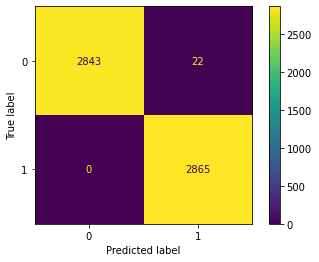

In [340]:
ytrain_pred = classifier_xgb.predict(X_train)

print('Performance Metrics :')
print('Accuracy: ',accuracy_score(y_train, ytrain_pred))
print('Precision: ',precision_score(y_train, ytrain_pred))
print('F1-Score: ',f1_score(y_train, ytrain_pred))
print('Mean Squared Error:', mean_squared_error(y_train, ytrain_pred ))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, ytrain_pred )))

plot_confusion_matrix(classifier_xgb,X_train, y_train, values_format='d')

Performance Metrics :
Accuracy:  0.8986058301647655
Precision:  0.4
F1-Score:  0.3548387096774193
Mean Squared Error: 0.10139416983523447
Root Mean Squared Error: 0.3184245119886886


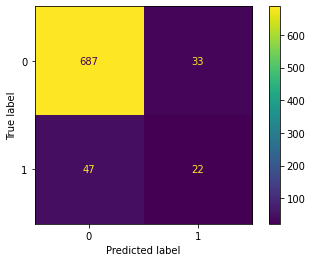

In [341]:
y_test_pred = classifier_xgb.predict(X_test)

print('Performance Metrics :')
print('Accuracy: ',accuracy_score(y_test, y_test_pred))
print('Precision: ',precision_score(y_test, y_test_pred))
print('F1-Score: ',f1_score(y_test, y_test_pred,labels=np.unique(y_test_pred)))
print('Mean Squared Error:', mean_squared_error(y_test, y_test_pred ))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_test_pred )))

plot_confusion_matrix(classifier_xgb,X_test, y_test, values_format='d')

In [342]:
print('Train Accuracy : ',accuracy_score(y_train, ytrain_pred))
print('Test Accuracy : ',accuracy_score(y_test, ytest_pred))

Train Accuracy :  0.9961605584642234
Test Accuracy :  0.8986058301647655


## Feature Importance Analysis

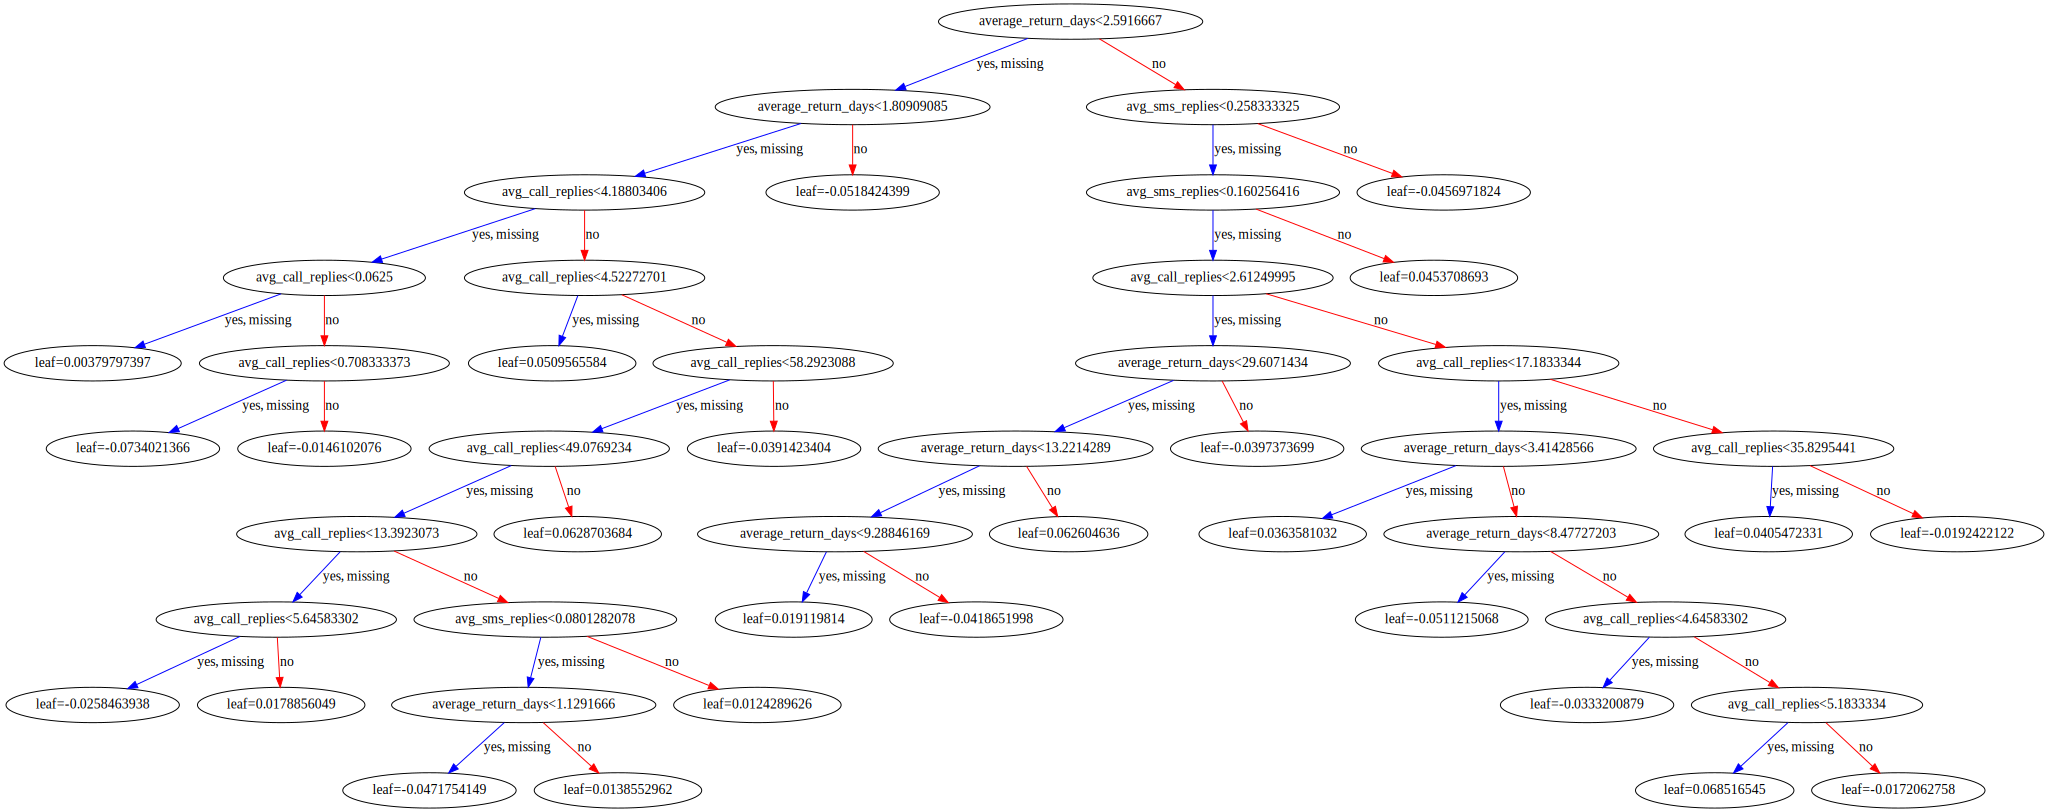

In [350]:
import graphviz
xgboost.to_graphviz(classifier_xgb, num_trees=xgb_model.best_iteration)

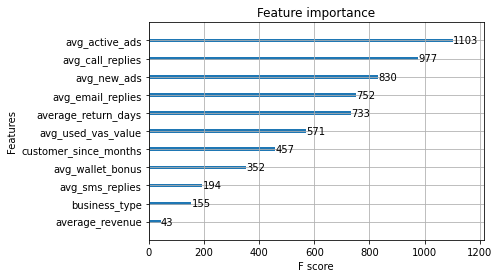

In [351]:
xgboost.plot_importance(classifier_xgb)

## By Using SHAP values 

In [345]:
pip install shap

In [346]:
import shap

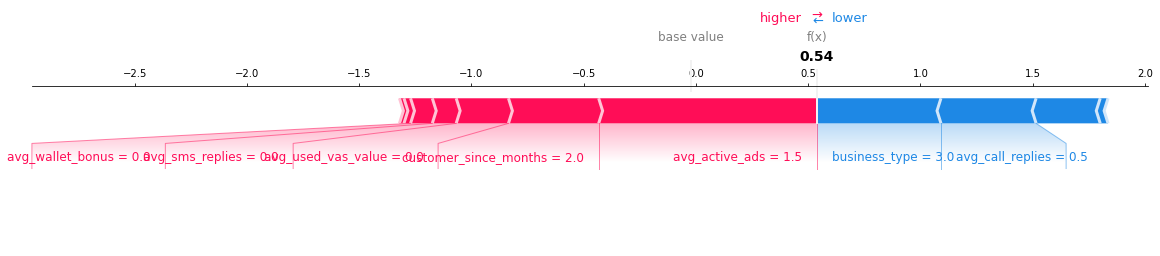

In [352]:
explainer = shap.TreeExplainer(classifier_xgb)
shap_values = explainer.shap_values(X_test)

shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:],matplotlib=True)

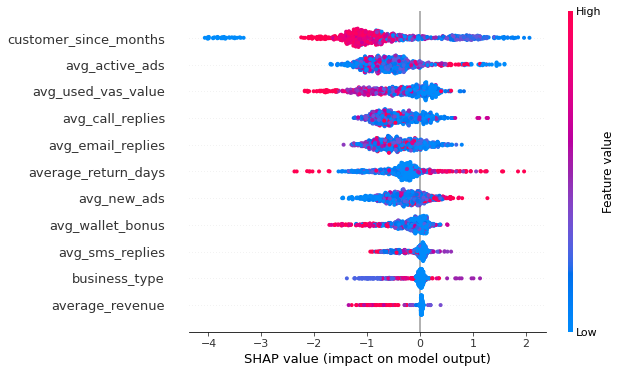

In [353]:
shap.summary_plot(shap_values, X_test)

Now the concluding remarks from this are:


1.   Customer which has been a member from long time will continue, while the new customer are likely to leave
2.   The impact of the ads is coming out to opposite of what they were meant for
3.   This same scenario is with the email and calls
4.   SMS replies seems to be better option among emails, calls and ads




# 2. Using Deep Learning (Pytorch)

## Preprocessing the Data

In [118]:
dataset = df[features]
dataset['target'] = df['target']
dataset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,1.500000,14,0.0,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,8.200000,10,0.0,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,1.533333,15,0.0,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,1.000000,14,0.0,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,1.000000,18,0.0,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4401,1.000000,1,0.0,0.000000,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
4402,1.000000,4,0.0,0.000000,3,0.0,4.666667,2.000000,9.666667,14.666667,0.333333,0
4403,1.000000,2,0.0,0.000000,4,0.0,153.000000,76.500000,9.000000,11.500000,0.000000,0
4404,1.000000,2,0.0,0.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
def normalize(df,features):
  mms = MinMaxScaler(feature_range=(-1,1))
  data = pd.DataFrame(data = df[features], columns=features)
  data[features] = mms.fit_transform(data[features])
  return data

In [121]:
data = normalize(dataset,features)
data.head()

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
0,-0.941691,0.130435,-1.0,-0.814815,-1.0,-0.682827,-0.911269,-0.806349,-0.549046,-0.715471,-0.888889
1,-0.551020,-0.217391,-1.0,-0.683333,-1.0,-1.000000,-0.740407,-0.767619,-0.774639,-0.859349,-1.000000
2,-0.939747,0.217391,-1.0,-0.703704,-1.0,-0.841413,-0.938392,-0.952381,-0.718299,-0.750294,-1.000000
3,-0.970845,0.130435,-1.0,-0.510684,-1.0,0.565779,-0.541950,0.025641,0.216693,-0.412779,-1.000000
4,-0.970845,0.478261,-1.0,-0.696581,-1.0,-0.956124,-0.946056,-0.978510,-0.757089,-0.737358,-0.897436


In [122]:
description(data)

Unique values for  average_return_days  :  755
Unique values for  customer_since_months  :  22
Unique values for  average_revenue  :  431
Unique values for  avg_used_vas_value  :  939
Unique values for  business_type  :  6
Unique values for  avg_wallet_bonus  :  797
Unique values for  avg_active_ads  :  2491
Unique values for  avg_new_ads  :  1262
Unique values for  avg_email_replies  :  1707
Unique values for  avg_call_replies  :  1755
Unique values for  avg_sms_replies  :  98


In [123]:
data['target']= df['target']
data.head()

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,-0.941691,0.130435,-1.0,-0.814815,-1.0,-0.682827,-0.911269,-0.806349,-0.549046,-0.715471,-0.888889,0
1,-0.551020,-0.217391,-1.0,-0.683333,-1.0,-1.000000,-0.740407,-0.767619,-0.774639,-0.859349,-1.000000,0
2,-0.939747,0.217391,-1.0,-0.703704,-1.0,-0.841413,-0.938392,-0.952381,-0.718299,-0.750294,-1.000000,0
3,-0.970845,0.130435,-1.0,-0.510684,-1.0,0.565779,-0.541950,0.025641,0.216693,-0.412779,-1.000000,1
4,-0.970845,0.478261,-1.0,-0.696581,-1.0,-0.956124,-0.946056,-0.978510,-0.757089,-0.737358,-0.897436,0


## Spliting the Data

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
dataset = data[features]
dataset['target'] = data['target']
dataset

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,-0.941691,0.130435,-1.0,-0.814815,-1.0,-0.682827,-0.911269,-0.806349,-0.549046,-0.715471,-0.888889,0
1,-0.551020,-0.217391,-1.0,-0.683333,-1.0,-1.000000,-0.740407,-0.767619,-0.774639,-0.859349,-1.000000,0
2,-0.939747,0.217391,-1.0,-0.703704,-1.0,-0.841413,-0.938392,-0.952381,-0.718299,-0.750294,-1.000000,0
3,-0.970845,0.130435,-1.0,-0.510684,-1.0,0.565779,-0.541950,0.025641,0.216693,-0.412779,-1.000000,1
4,-0.970845,0.478261,-1.0,-0.696581,-1.0,-0.956124,-0.946056,-0.978510,-0.757089,-0.737358,-0.897436,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4401,-0.970845,-1.000000,-1.0,-1.000000,0.6,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4402,-0.970845,-0.739130,-1.0,-1.000000,0.2,-1.000000,-0.994781,-0.974603,-0.865525,-0.850516,-0.851852,0
4403,-0.970845,-0.913043,-1.0,-1.000000,0.6,-1.000000,-0.828876,-0.028571,-0.874799,-0.882791,-1.000000,0
4404,-0.970845,-0.913043,-1.0,-1.000000,-0.6,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


In [126]:
X_train, X_test = train_test_split(
...     dataset, test_size=0.20, random_state=42)

y_train, y_test = X_train['target'], X_test['target'] 
# ########################################################
# X_train, X_val= train_test_split(
# ...     X, test_size=0.15, random_state=42)

# y_train, y_val = X_train['target'], X_val['target'] 
# ########################################################

X_train= X_train.drop('target',1)
# X_val  = X_val.drop('target',1)
X_test = X_test.drop('target',1)

X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((3154, 11), (3154,), (789, 11), (789,))

In [127]:
X_train

,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies
3763,-0.970845,-1.000000,-1.000000,-1.000000,-0.6,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1279,-0.917022,0.043478,-1.000000,-0.680556,-1.0,-0.788551,-0.862430,-0.609524,-0.196629,-0.266170,-0.925926
1731,0.073416,-0.130435,-1.000000,-0.511111,-1.0,-0.978855,-0.724748,-0.856508,-0.578491,-0.693218,-1.000000
3147,-0.970845,-0.913043,-1.000000,-0.861111,-1.0,-1.000000,-0.884240,-0.676190,-0.902622,-0.923559,-1.000000
3301,-0.620991,-0.043478,-0.952725,-0.848485,-1.0,-0.920707,-0.966853,-0.889177,-0.649691,-0.688678,-0.959596
...,...,...,...,...,...,...,...,...,...,...,...
1296,-0.850340,0.217391,-1.000000,-0.476852,-1.0,-0.940794,-0.899619,-0.943915,-0.877118,-0.897230,-0.925926
1478,-0.475219,-0.739130,-1.000000,-1.000000,-1.0,-1.000000,-0.790849,-0.907937,-0.888711,-0.908271,-1.000000
983,-0.863198,0.043478,-1.000000,-1.000000,1.0,-1.000000,-0.990307,-0.997884,-0.977974,-0.988959,-1.000000
3949,-0.970845,-0.478261,-1.000000,-0.861111,-0.6,-1.000000,-0.973903,-0.928042,-0.914214,-0.940546,-0.925926


## Libraries

In [130]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from datetime import datetime

## Dataset Genearator

In [131]:
class Dataset_gen(Dataset):
    def __init__(self, X, Y):
        self.x = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
      if isinstance(idx, torch.Tensor):
            idx = idx.tolist()
      return self.x[idx], self.y[idx]

In [132]:
train_data = Dataset_gen(torch.FloatTensor(X_train.values), torch.FloatTensor(y_train.values))
test_data = Dataset_gen(torch.FloatTensor(X_test.values), torch.FloatTensor(y_test.values))

## Network Architecture 

In [133]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Number of input features is 11.
        self.layer_1 = nn.Linear(11, 128) 
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(p=0.4)

        self.layer_2 = nn.Linear(128, 1024)
        self.batchnorm2 = nn.BatchNorm1d(1024)
        self.dropout2 = nn.Dropout(p=0.5)

        self.layer_3 = nn.Linear(1024, 512)
        self.batchnorm3 = nn.BatchNorm1d(512)
        self.dropout3 = nn.Dropout(p=0.5)

        self.layer_4 = nn.Linear(512, 64)
        self.batchnorm4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(p=0.5)

        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        
        
        
        
    def forward(self, inputs):
        x = self.layer_1(inputs)
        x = self.relu(x)
        x = self.batchnorm1(x)
        x = self.dropout1(x)

        x = self.layer_2(x)
        x = self.relu(x)
        x = self.batchnorm2(x)
        x = self.dropout2(x)

        x = self.layer_3(x)
        x = self.relu(x)
        x = self.batchnorm3(x)
        x = self.dropout3(x)

        x = self.layer_4(x)
        x = self.relu(x)
        x = self.batchnorm4(x)
        x = self.dropout4(x)

        x = self.layer_out(x)
        
        return x

In [134]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Defining Network Parameters

In [135]:
model = Network()
model.to(device)

Network(
  (layer_1): Linear(in_features=11, out_features=128, bias=True)
  (batchnorm1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.4, inplace=False)
  (layer_2): Linear(in_features=128, out_features=1024, bias=True)
  (batchnorm2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (layer_3): Linear(in_features=1024, out_features=512, bias=True)
  (batchnorm3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (layer_4): Linear(in_features=512, out_features=64, bias=True)
  (batchnorm4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout(p=0.5, inplace=False)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [136]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-2)

In [137]:
train_loader = DataLoader(dataset=train_data, batch_size=len(X_train), shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=len(X_test), shuffle=True)

## Training
We'll be training the model on GPU

In [138]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [139]:
model.train()
epochs = 200
for e in range(1, epochs+1):
    epoch_loss = 0
    epoch_acc = 0
    for data, target_label in train_loader:
        data, target_label = data.to(device), target_label.to(device)
        optimizer.zero_grad()
        
        y_pred = model(data)
        
        loss = criterion(y_pred, target_label.unsqueeze(1))
        acc = binary_acc(y_pred, target_label.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.76286 | Acc: 45.000
Epoch 002: | Loss: 0.73265 | Acc: 56.000
Epoch 003: | Loss: 0.73051 | Acc: 58.000
Epoch 004: | Loss: 0.71481 | Acc: 57.000
Epoch 005: | Loss: 0.72084 | Acc: 54.000
Epoch 006: | Loss: 0.70850 | Acc: 53.000
Epoch 007: | Loss: 0.70422 | Acc: 53.000
Epoch 008: | Loss: 0.70520 | Acc: 53.000
Epoch 009: | Loss: 0.70195 | Acc: 55.000
Epoch 010: | Loss: 0.70954 | Acc: 56.000
Epoch 011: | Loss: 0.69648 | Acc: 56.000
Epoch 012: | Loss: 0.69281 | Acc: 58.000
Epoch 013: | Loss: 0.69141 | Acc: 57.000
Epoch 014: | Loss: 0.69314 | Acc: 60.000
Epoch 015: | Loss: 0.68659 | Acc: 60.000
Epoch 016: | Loss: 0.68405 | Acc: 60.000
Epoch 017: | Loss: 0.68062 | Acc: 61.000
Epoch 018: | Loss: 0.68321 | Acc: 61.000
Epoch 019: | Loss: 0.67658 | Acc: 61.000
Epoch 020: | Loss: 0.68347 | Acc: 61.000
Epoch 021: | Loss: 0.67392 | Acc: 62.000
Epoch 022: | Loss: 0.68117 | Acc: 61.000
Epoch 023: | Loss: 0.67174 | Acc: 63.000
Epoch 024: | Loss: 0.66769 | Acc: 64.000
Epoch 025: | Los

In [140]:
y_pred_list = []
for data, target_label in test_loader:
        data, target_label = data.to(device), target_label.to(device)
        
        y_pred = model(data)
        
        y_test_pred1 = model(data)
        y_test_pred = torch.sigmoid(y_test_pred1)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.extend(y_pred_tag.cpu().detach().numpy())

        acc = binary_acc(y_test_pred1, target_label.unsqueeze(1))

        
print('Accuracy on Test Data :', acc.item())

Accuracy on Test Data : 90.0


## Analysing the Result

In [141]:
from sklearn.metrics import confusion_matrix

In [142]:
confusion_matrix(y_test, y_pred_list)

array([[697,  23],
       [ 67,   2]])

# Comparing the Two models

The concluding remark in terms of comparing the Deep Learning Model and ML model


1.   XGBoost has its own benefits which includes

*   Better Analysis
*   Easy to train 
*   Requires proper data preprocessing
*   Feature dimension have significant effect on training time and model accuracy


2.   Deep learning Model has some advantages over XGBoost

*   Very customizable network, can be made very very deep
*   Requires very less data preprocessing, as we can see above, XGBoost required Oversampling whereas DNN was able to achieve similar accuracy with just normalising the data
*   Can be trained for very very large dataset where XGBoost can possible give unrelible results
*   Feature Dimension can be very large, which is a problem in case of XGBoost


So, both models have their own benefits its dependent on the dataset and the objective to decide whihc model to choose





